# Stage 4: The Sun (Coronal Imaging)

A very important part of our Solar System is the Sun itself. It is for this reason that we, as its residents, have many observatories, both ground and space-based, that take measurements related to it and its influence.



1.   Installing the relevant modules
2.   Fetching Images from current spacecraft
3.   Plotting them
4.   Making a video in Python (intro)

## Installing the relevant modules

The first step here will be to get a module installed inside the jupyter notebook. To do that, just **run the following line the first time you open this notebook:**

In [ ]:
!pip install -q sunpy[all]  # This package is used for all things Sun-related, hosted in github: https://github.com/sunpy/sunpy


**After the installation is finished, click on Runtime and Restart the Runtime with Control + M!**

In [8]:
from sunpy.net import Fido, attrs as a
from astropy import units as u  

from datetime import datetime   # Python's small Time module

import warnings
warnings.simplefilter('ignore')  # We will ignore warnings for now

valid_wavelengths = [94, 131, 171, 193, 211, 304, 335, 1600, 1700]  # Note that 16/1700 are white light and not as useful here!


Inst = 'aia'  # Here we will use the Atmospheric Imaging Assembly: aia
# It is onboard the Solar Dynamics Observatory. 
#Provides us with images of the Sun almost 24-7!


# Now choose the period we would like to get our data from. Please don't do too much at once!

start_time = datetime(2012,8,31,18,0)  # Year,Month,Day,Hour,Minute
end_time = datetime(2012,8,31,23,59)

time_range = a.Time(start_time, end=end_time)

lambda_ang = valid_wavelengths[2] * u.Angstrom  # Choose the 171 Angstrom wavelength as an example (Extreme Ultraviolet)


samplerate_hours = 12 * u.minute  # We need to give our images a cadence for collection. 
# Please keep in mind that aia takes an image in all of its wavelengths every 12 seconds.
# Choose a cadence depending on what you want to bring out!

aia_query = time_range & a.Instrument.aia & a.Wavelength(lambda_ang) & a.Sample(samplerate_hours)

fido = Fido.search(aia_query)

print(fido)

Results from 1 Provider:

24 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 1.627 Gbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2012-08-31 18:00:11.000 2012-08-31 18:00:12.000    SDO ...    FULLDISK 64.64844
2012-08-31 18:15:11.000 2012-08-31 18:15:12.000    SDO ...    FULLDISK 64.64844
2012-08-31 18:30:11.000 2012-08-31 18:30:12.000    SDO ...    FULLDISK 64.64844
2012-08-31 18:45:11.000 2012-08-31 18:45:12.000    SDO ...    FULLDISK 64.64844
2012-08-31 19:00:11.000 2012-08-31 19:00:12.000    SDO ...    FULLDISK 64.64844
2012-08-31 19:15:11.000 2012-08-31 19:15:12.000    SDO ...    FULLDISK 64.64844
2012-08-31 19:30:11.000 2012-08-31 19:30:12.000    SDO ...    FULLDISK 64.64844
2012-08-31 19:45:11.000 2012-08-31 19:45:12.000    SDO ...   

Now, we should have a series of results showing above this text-box. These are available records that we may now download using Fido.fetch function:
However, we are not going to download now, since we already have the data downloaded. Still, you can try run this command at home later.

In [9]:
# # Download the data from the search results from online database
# from os import makedirs as newdir
# # Create new directories in google colab
# dir_images = 'My_folder/'
# newdir(dir_images, exist_ok = True)
# # download data using Fido.fetch
# Fido.fetch(fido, path = dir_images)

Files Downloaded:   0%|          | 0/24 [00:00<?, ?file/s]

aia_lev1_171a_2012_08_31t18_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t18_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t19_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t19_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t20_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t20_45_00_95z_image_lev1.fits:   0%|          | 0.00/11.1M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t21_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t21_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t22_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t22_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t23_15_11_35z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t23_45_11_35z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

['My_folder/aia_lev1_171a_2012_08_31t18_00_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t18_15_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t18_30_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t18_45_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t19_00_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t19_15_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t19_30_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t19_45_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t20_00_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t20_15_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t20_30_12_12z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t20_45_00_95z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t21_00_08_50z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t21_15_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t21_30_11_34z_image_lev1.f

In [ ]:
# download data from pre-loaded github folder
from shutil import rmtree
from os import path

if path.exists('WEW2024_database/'): # You wouldn't need these two lines if you're plotting a different date!
    rmtree(path.join('WEW2024_database/'))
    
! git clone https://github.com/nawinnova/WEW2024_database.git # We're downloading data from github so it's quicker!

dir_images = 'WEW2024_database/Sampledata_AIA171/'

## Looking at our newly acquired data

Now we need to access this data. For this we may use sunpy:

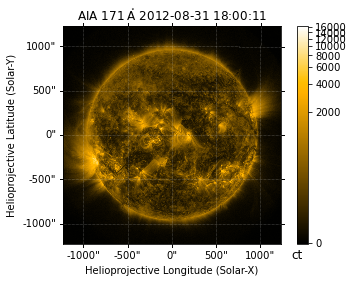

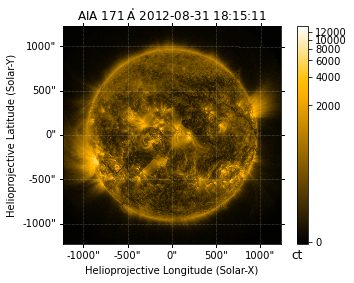

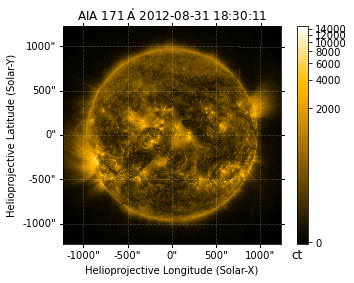

Saved figure 0
Saved figure 1
Saved figure 2
Saved figure 3
Saved figure 4
Saved figure 5
Saved figure 6
Saved figure 7
Saved figure 8
Saved figure 9
Saved figure 10
Saved figure 11
Saved figure 12
Saved figure 13
Saved figure 14
Saved figure 15
Saved figure 16
Saved figure 17
Saved figure 18
Saved figure 19
Saved figure 20
Saved figure 21
Saved figure 22
Saved figure 23


<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import sunpy.map
import glob  # To fetch all files from a directory
from os import makedirs as newdir


map_list = sorted(glob.glob(dir_images + '*.fits'))
 
for picture in map_list[0:3]:
  
  aia_map = sunpy.map.Map(picture)
  aia_map.peek()
  
input('Happy with the results? Press enter again in this box to save all of the figures as png images')


dir_png = 'My_pics_AIA'
newdir(dir_png, exist_ok = True)

for index, picture in enumerate(map_list):
  aia_map = sunpy.map.Map(picture)
  aia_map.plot()
  plt.savefig(f'{dir_png}/{index:03d}.png', dpi=150)
  plt.clf()
  
  print(f'Saved figure {index}')
  

As we have just seen, it is fairly straightforward to get images from a spacecraft into Python and show them, but what can we do once we have these images?

## Making videos out of our material

A first good use of these images is to study the dynamics of the solar atmosphere, known to affect spacecraft and the Earth's weather! To do that, we need to have a look at all of the images in rapid succession.

In [12]:
import cv2  # Here, we import OpenCV, a powerful image and video processing tool
from os import getcwd


img_array = []

for filename in sorted(glob.glob(f'{dir_png}/*.png')):
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)

out = cv2.VideoWriter('solar_vid_disk.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 6, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


With the above, we will have created a movie called "solar_vid_disk.mp4", which shows the filament evolution and eruption

### Question: What time did the filament eruption happen? ###